In [97]:
import numpy as np
import pandas as pd
import lifelines as ll
from IPython.display import HTML
from pylab import rcParams
from lifelines import KaplanMeierFitter
rcParams['figure.figsize']=10, 5

In [98]:
#import data
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

group = "group" #change to column name of grouping column
zero = "miR-137" #group names
one = "miR-137"
two = "control"

        T  E    group
0     6.0  1  miR-137
1    13.0  1  miR-137
2    13.0  1  miR-137
3    13.0  1  miR-137
4    19.0  1  miR-137
5    19.0  1  miR-137
6    19.0  1  miR-137
7    26.0  1  miR-137
8    26.0  1  miR-137
9    26.0  1  miR-137
10   26.0  1  miR-137
11   26.0  1  miR-137
12   33.0  1  miR-137
13   33.0  1  miR-137
14   47.0  1  miR-137
15   62.0  1  miR-137
16   62.0  1  miR-137
17    9.0  1  miR-137
18    9.0  1  miR-137
19    9.0  1  miR-137
20   15.0  1  miR-137
21   15.0  1  miR-137
22   22.0  1  miR-137
23   22.0  1  miR-137
24   22.0  1  miR-137
25   22.0  1  miR-137
26   29.0  1  miR-137
27   29.0  1  miR-137
28   29.0  1  miR-137
29   29.0  1  miR-137
..    ... ..      ...
133  69.0  1  control
134  38.0  1  control
135  38.0  1  control
136  45.0  1  control
137  45.0  1  control
138  45.0  1  control
139  45.0  1  control
140  45.0  1  control
141  45.0  1  control
142  45.0  1  control
143  45.0  1  control
144  45.0  0  control
145  45.0  1  control
146  53.0 

In [99]:
T = df['T']
E = df['E']

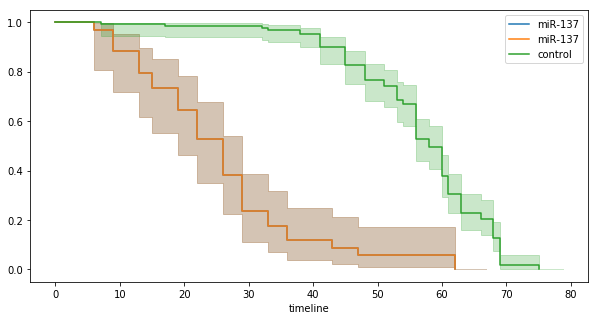

In [100]:
kmf = KaplanMeierFitter()
#kmf.fit(T, event_observed=E)  # or, more succiently, kmf.fit(T, E)
#km_data=kmf.survival_function_ # data used for ploting Kaplan Meier curve

#kmf.median_
#a = kmf.plot()
groups = df[group]

ix = (groups == zero)
yx = (groups == one)
zx = (groups == two)

kmf.fit(T[ix], E[ix], label=zero)
km_data_zero=kmf.survival_function_
confidence_zero = kmf.confidence_interval_

ax = kmf.plot()

kmf.fit(T[yx], E[yx], label=one)
km_data_one=kmf.survival_function_
confidence_one = kmf.confidence_interval_
kmf.plot(ax=ax)

kmf.fit(T[zx], E[zx], label=two)
km_data_two=kmf.survival_function_
confidence_two = kmf.confidence_interval_
kmf.plot(ax=ax)

In [102]:
#extracting confidence intervals
upper_zero = confidence_one.iloc[:,0].tolist()
upper_one = confidence_one.iloc[:,0].tolist()
upper_two = confidence_two.iloc[:,0].tolist()

lower_zero = confidence_zero.iloc[:,1].tolist()
lower_one = confidence_one.iloc[:,1].tolist()
lower_two = confidence_two.iloc[:,1].tolist()

In [103]:
time_list_zero=km_data_zero.index.values.tolist()
time_list_one=km_data_one.index.values.tolist()
time_list_two=km_data_two.index.values.tolist()

proportions_list_zero = km_data_zero.iloc[:,0].tolist()
proportions_list_one = km_data_one.iloc[:,0].tolist()
proportions_list_two = km_data_two.iloc[:,0].tolist()

In [105]:
import numpy as np
from collections import OrderedDict
from bokeh.plotting import *
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool

x_zero = time_list_zero
x_one = time_list_one
x_two = time_list_two

y_zero = proportions_list_zero
y_one = proportions_list_one
y_two = proportions_list_two

upperband_zero = upper_zero
upperband_one = upper_one
upperband_two = upper_two

lowerband_zero = lower_zero
lowerband_one = lower_one
lowerband_two = lower_two

#band_x = np.append(x, x[::-1])
#band_y = np.append(lowerband, upperband[::-1])

output_file("line.html", title="Genotype Time To Event Kapalan Meier")

source_zero = ColumnDataSource(
    data=dict(
        x= x_zero,
        y= y_zero,
        label=["%s - %s" % (upper_, lower_) for upper_, lower_ in zip(upper_zero, lower_zero)]
    )
)

source_one = ColumnDataSource(
    data=dict(
        x= x_one,
        y= y_one,
        label=["%s - %s" % (upper_, lower_) for upper_, lower_ in zip(upper_one, lower_one)]
    )
)

source_two = ColumnDataSource(
    data=dict(
        x= x_two,
        y= y_two,
        label=["%s - %s" % (upper_, lower_) for upper_, lower_ in zip(upper_two, lower_two)]
    )
)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover,previewsave"
p = figure(title="Genotype Time-to-Event Survival",tools=TOOLS)

p.circle('x', 'y', color="#ec134b", line_width=2, source=source_zero)
p.circle('x', 'y', color="#2222aa", line_width=2, source=source_one)
p.circle('x', 'y', color="#9456aa", line_width=2, source=source_two)

p.step(x_zero,y_zero, color="#ec134b", line_width=2)
p.step(x_one,y_one, color="#2222aa", line_width=2)
p.step(x_two,y_two, color="#9456aa", line_width=2)

p.step(x_zero,upper_zero, color="#ec134b", line_width=.25)
p.step(x_one,upper_one, color="#4444aa", line_width=.25)
p.step(x_two,upper_two, color="#9456aa", line_width=.25)

p.step(x_zero,lower_zero, color="#ec134b", line_width=.25)
p.step(x_one,lower_one, color="#4444aa", line_width=.25)
p.step(x_two,lower_two, color="#9456aa", line_width=.25)

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("Time, KM Estimate", "(@x, @y)"),
    ("Upper - Lower", "@label"),
])
#p.ygrid[0].ticker.desired_num_ticks = 20

show(p)

